In [1]:
from google.colab import drive  #connecting google drive to colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd         # Importing the necessary libraries for this task
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/energydata_complete.csv')   #Loading of the dataset
print (data)

                   date  Appliances  lights         T1       RH_1         T2  \
0      11/01/2016 17:00          60      30  19.890000  47.596667  19.200000   
1      11/01/2016 17:10          60      30  19.890000  46.693333  19.200000   
2      11/01/2016 17:20          50      30  19.890000  46.300000  19.200000   
3      11/01/2016 17:30          50      40  19.890000  46.066667  19.200000   
4      11/01/2016 17:40          60      40  19.890000  46.333333  19.200000   
...                 ...         ...     ...        ...        ...        ...   
19730  27/05/2016 17:20         100       0  25.566667  46.560000  25.890000   
19731  27/05/2016 17:30          90       0  25.500000  46.500000  25.754000   
19732  27/05/2016 17:40         270      10  25.500000  46.596667  25.628571   
19733  27/05/2016 17:50         420      10  25.500000  46.990000  25.414000   
19734  27/05/2016 18:00         430      10  25.500000  46.600000  25.264286   

            RH_2         T3       RH_3 

In [4]:
simple_linear_reg_df = data[['T2', 'T6']].sample(15, random_state=2)

In [5]:
from sklearn.preprocessing import MinMaxScaler    ##Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()

<Axes: xlabel='T2', ylabel='T6'>

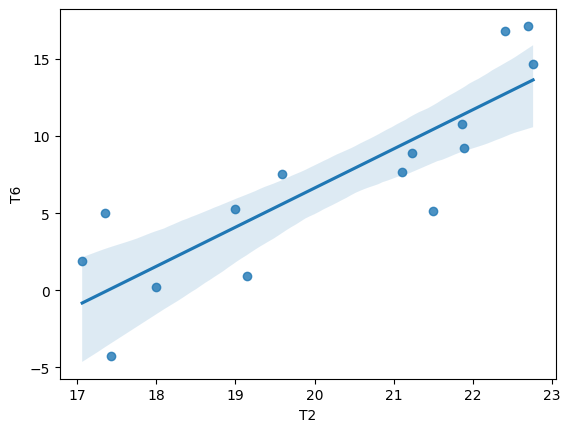

In [7]:
sns.regplot(x="T2", y="T6",
            data=simple_linear_reg_df)

In [8]:
from sklearn.preprocessing import MinMaxScaler    ##Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()

In [ ]:
normalised_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [10]:
x = data.drop(columns=['date', 'lights', 'Appliances'])
y = data['Appliances']

In [11]:
from sklearn.model_selection import train_test_split        #splitting dataset into the training and testing dataset.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler    # normalising the dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
x_train_scaled =scaler.fit_transform (x_train)
x_test_scaled =scaler.transform (x_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)  #fit the model to the training dataset

LinearRegression()

In [16]:
y_predict_train = model.predict(x_train_scaled)
y_predict_test =  model.predict(x_test_scaled)

In [17]:
from sklearn.metrics import mean_absolute_error

In [19]:
mae_train = mean_absolute_error(y_train, y_predict_train)
print ("mean_absolute_error on training set:", round(mae_train, 3))

mean_absolute_error on training set: 53.743


In [21]:
rmse_train = mean_squared_error(y_train, y_predict_train, squared=False)
print ("RMSE on training set:", round(rmse_train, 3))

RMSE on training set: 95.215


In [ ]:
mae_test = mean_absolute_error(x_train, y_predict_test)
print ("mean_absolute_error on test set:", round(mae_test, 3))

In [22]:
rmse_test = mean_squared_error(y_test, y_predict_test, squared=False)
print ("RMSE on test set:", round(rmse_test, 3))

RMSE on test set: 93.641


In [25]:
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [29]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(x_train_scaled, y_train)

print(f"Best alpha for Ridge: {ridge_cv.best_params_['alpha']}")

Best alpha for Ridge: 0.1


In [34]:
# Train model with the best alpha param
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(x_train_scaled, y_train)